# Youtube Adview Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as pl

### Reading CSV file with 15000 entries

In [2]:
data_train = pd.read_csv(r"C:\Users\Aryan\Documents\Projects\CPP-Codes\VSCode codes\MachineLearning\train.csv")
data_train.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [3]:
data_train.shape
# (14999,9)

(14999, 9)

### Assigning each category (ABCDEFGH) a number for Category feature


In [4]:
category = { "A":1, 'B':2, 'C':3, 'D':4, 'E':5, "F":6, 'G':7, 'H':8 }
data_train['category'] = data_train['category'].map(category)
data_train.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,4
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,4
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,5
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,6
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,2


### Removing Character 'F' in the dataset

In [5]:
data_train = data_train[data_train.views!='F']
data_train = data_train[data_train.likes!='F']
data_train = data_train[data_train.dislikes!='F']
data_train = data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


### Convert values to integers for views, likes, dislikes, comments and adview

In [7]:
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [8]:
column_vidid = data_train['vidid']

### Encoding Features like category, duration, vidid

In [9]:
from sklearn.preprocessing import LabelEncoder
data_train['duration'] = LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


### Convert Time in seconds for duration

In [10]:
import datetime
import time

def checki(x):
    y = x[2:]
    hours = ''
    minutes = ''
    seconds = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm += i
        else :
            if(i=="H"):
                hours = mm
                mm = ''
            elif(i=="M"):
                minutes = mm 
                mm = ''
            else:
                seconds = mm
                mm = ''
    if(hours==''):
        hours = '00'
    if(minutes==''):
        minutes = '00'
    if(seconds==''):
        seconds = '00'
    
    bp = hours + ':' + minutes + ':' + seconds
    return bp
    
train = pd.read_csv(r"C:\Users\Aryan\Documents\Projects\CPP-Codes\VSCode codes\MachineLearning\train.csv")
mp = pd.read_csv(r"C:\Users\Aryan\Documents\Projects\CPP-Codes\VSCode codes\MachineLearning\train.csv")["duration"]

time = mp.apply(checki)
time

0         00:7:37
1         00:9:30
2         00:2:16
3         00:4:22
4        00:00:31
           ...   
14994     00:6:10
14995     00:3:56
14996     00:3:13
14997    00:00:26
14998      00:1:1
Name: duration, Length: 14999, dtype: object

In [11]:
# Function to convert to seconds
def func_sec(time_string):
    h,m,s =  time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1 = time.apply(func_sec)
data_train['duration'] = time1
# time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


### Visualization of Individual Plots

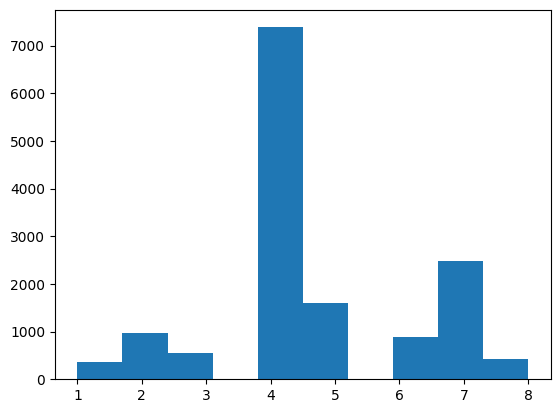

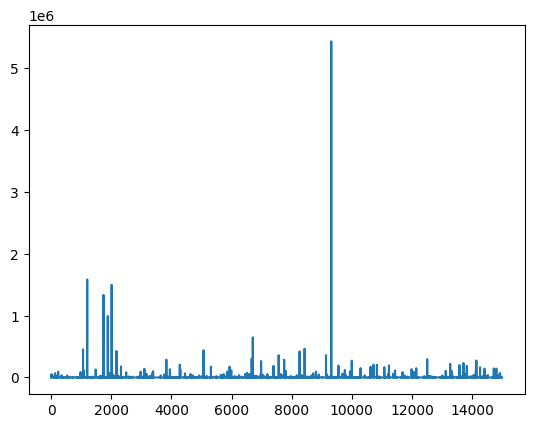

In [12]:
pl.hist(data_train['category'])
pl.show()
pl.plot(data_train['adview'])
pl.show()

In [13]:
# Removing Outliers adview > 2000000
data_train = data_train[data_train['adview'] < 2000000]

### Heatmap

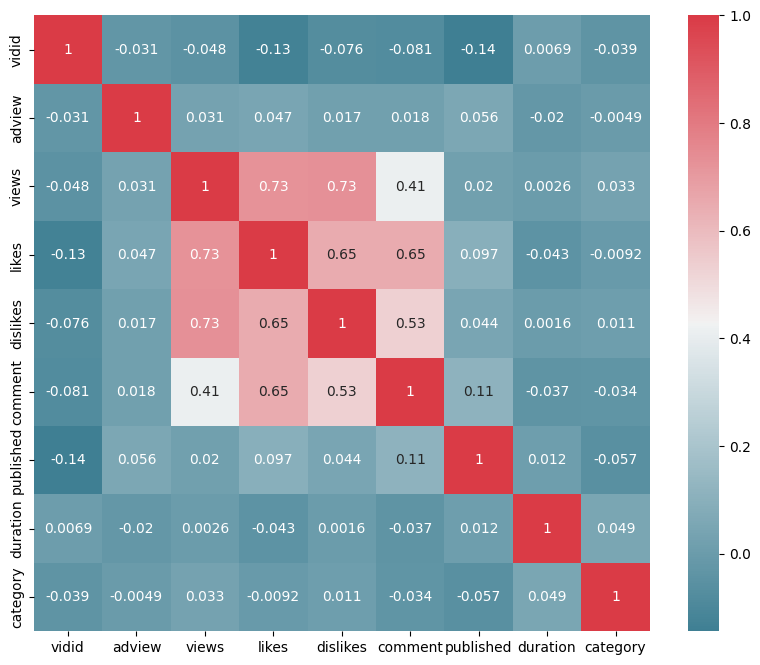

In [14]:
import seaborn as sns

f, ax = pl.subplots(figsize = (10,8))

# Correlation of each column in a DataFrame
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr,dtype = np.bool_), cmap = sns.diverging_palette(220, 10, as_cmap=True),
            square= True, ax =ax, annot= True)
pl.show()

In [15]:
Y_train = pd.DataFrame(data= data_train.iloc[:,1].values , columns= ['target'])

data_train = data_train.drop(["adview"],axis=1)
data_train = data_train.drop(["vidid"],axis=1)
data_train.head(10)

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4
5,78,0,0,0,2040,15,4
6,43118,15,1,0,1778,200,4
7,14205,55,16,1,2124,58,5
8,526015,3064,211,2582,1855,1670,6
9,406992,3831,310,7839,2187,679,2


### Splitting the data

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)


#Normalizing Data
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[6.27970800e-04, 4.12227296e-04, 1.82005703e-04, ...,
        5.10700797e-01, 4.25360966e-03, 4.28571429e-01],
       [1.02842406e-02, 3.12517617e-03, 7.32067383e-03, ...,
        6.49181704e-01, 1.37320699e-01, 8.57142857e-01],
       [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
        4.05371381e-01, 4.20634733e-03, 7.14285714e-01],
       ...,
       [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
        5.19093580e-01, 5.15159392e-03, 4.28571429e-01],
       [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
        9.00125892e-01, 5.67147955e-03, 8.57142857e-01],
       [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
        9.39991607e-02, 8.36543233e-03, 4.28571429e-01]])

### Evaluation Metrics

In [21]:
from sklearn import metrics
def print_error(X_test,y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,prediction))
    print('Mean Squared Error : ', metrics.mean_squared_error(y_test,prediction))
    print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

print_error(X_test,y_test,linear_regression)

Mean Absolute Error :  3707.3780058245306
Mean Squared Error :  835663131.1210337
Root Mean Squared Error :  28907.83857573986


### Decision Tree Regresssor

In [93]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)


print_error(X_test,y_test,decision_tree)
y_pred=decision_tree.predict(X_test)


Mean Absolute Error :  3546.465945237554
Mean Squared Error :  521072838.8292492
Root Mean Squared Error :  22827.019928787227


In [95]:
y_pred[:], y_test[:]

(array([21,  4,  1, ...,  2,  1,  2], dtype=int64),
 array([ 20.16109963, 120.16090101,   6.07595667, ...,  33.57280747,
        186.44278714,  16.78507039]))

### K Nearest Neighhours

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=54)
knr.fit(X_train,y_train)

print_error(X_test, y_test,knr)

Mean Absolute Error :  2914.041325136612
Mean Squared Error :  799541643.5230523
Root Mean Squared Error :  28276.167412205148


### Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators= n_estimators ,max_depth= max_depth , min_samples_split=min_samples_split , 
                                      min_samples_leaf= min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test, y_test, random_forest)

y_pred=random_forest.predict(X_test)
# y_pred[100:], y_test[100:]

C:\Users\Aryan\AppData\Local\Temp\ipykernel_3928\720516249.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error :  517.5442113518542
Mean Squared Error :  3807119.7372062337
Root Mean Squared Error :  1951.1841884369178


In [92]:
y_pred[100:], y_test[100:]

(array([505.51390407, 111.28421406, 272.72809448, ...,  33.32551367,
        245.66959621,  15.29982675]),
 array([1127.286432  ,  117.3203265 ,  356.08028174, ...,   33.57280747,
         186.44278714,   16.78507039]))

### Support Vector Regressor

In [26]:
from sklearn.svm import SVR
support_vector_regressor = SVR()
support_vector_regressor.fit(X_train,y_train)

print_error(X_test,y_test,support_vector_regressor)

c:\Users\Aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error :  1696.9438599505638
Mean Squared Error :  833685776.029172
Root Mean Squared Error :  28873.617300732723


### Artificial Neural Network

In [115]:
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

ann = Sequential([
    # input has 7 features and first Dense layer of 6 neurons
    # activation function is relu
    Dense(6,activation="relu",input_shape= X_train.shape[1:]),
    
    Dense(6,activation="relu"),
    # Final prediction adview has one neuron
    Dense(1)
])

optimizer = Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss,metrics=["mean_squared_error"])

history = ann.fit(X_train,y_train, epochs=200)#epochs is the number of iterations

ann.summary()

Epoch 1/200
366/366 [==============================] - 1s 1ms/step - loss: 767407424.0000 - mean_squared_error: 767407424.0000
Epoch 2/200
366/366 [==============================] - 1s 2ms/step - loss: 767404864.0000 - mean_squared_error: 767404864.0000
Epoch 3/200
366/366 [==============================] - 1s 2ms/step - loss: 767399936.0000 - mean_squared_error: 767399936.0000
Epoch 4/200
366/366 [==============================] - 1s 1ms/step - loss: 767392640.0000 - mean_squared_error: 767392640.0000
Epoch 5/200
366/366 [==============================] - 1s 2ms/step - loss: 767382720.0000 - mean_squared_error: 767382720.0000
Epoch 6/200
366/366 [==============================] - 1s 1ms/step - loss: 767368832.0000 - mean_squared_error: 767368832.0000
Epoch 7/200
366/366 [==============================] - 1s 2ms/step - loss: 767350848.0000 - mean_squared_error: 767350848.0000
Epoch 8/200
366/366 [==============================] - 0s 1ms/step - loss: 767328256.0000 - mean_squared_error:

### Saving Scikit Learn Models

In [97]:
import joblib
# We just save the decision tree model
joblib.dump(decision_tree, "decisionTree_YouTubeAdview.pkl")
joblib.dump(random_forest, "randomForest_YouTubeAdview.pkl")
joblib.dump(knr,"kNeighbours_YouTubeAdview.pkl")
joblib.dump(support_vector_regressor,"SVM_YouTubeAdview.pkl")

['SVM_YouTubeAdview.pkl']

### Saving Keras Artificial Neural Network Model

In [31]:
ann.save("ann_YouTubeAdview.h5")

## Testing Starts

In [32]:
data_test = pd.read_csv(r"C:\Users\Aryan\Documents\Projects\CPP-Codes\VSCode codes\MachineLearning\test.csv")
data_test.head(10)

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
5,VID_10315,145820,215,29,19,2014-01-23,PT39M18S,D
6,VID_7417,12921,169,3,73,2014-05-01,PT10M4S,D
7,VID_17788,4502,65,2,8,2016-07-13,PT2M35S,F
8,VID_14591,662956,1841,321,219,2014-01-13,PT13M57S,D
9,VID_1228,552009,6732,97,1100,2016-08-25,PT17M49S,B


In [33]:
data_test.shape
#(8764,8)

(8764, 8)

In [34]:
category = { "A":1, 'B':2, 'C':3, 'D':4, 'E':5, "F":6, 'G':7, 'H':8 }
data_test['category'] = data_test['category'].map(category)
data_test.head(10)

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2
5,VID_10315,145820,215,29,19,2014-01-23,PT39M18S,4
6,VID_7417,12921,169,3,73,2014-05-01,PT10M4S,4
7,VID_17788,4502,65,2,8,2016-07-13,PT2M35S,6
8,VID_14591,662956,1841,321,219,2014-01-13,PT13M57S,4
9,VID_1228,552009,6732,97,1100,2016-08-25,PT17M49S,2


### F in 190 row

In [35]:
data_test = data_test[data_test.views!='F']
data_test = data_test[data_test.likes!='F']
data_test = data_test[data_test.dislikes!='F']
data_test = data_test[data_test.comment!='F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


### Convert values to integers for views, likes, dislikes and comment

In [37]:
data_test["views"]=pd.to_numeric(data_test["views"])
data_test["likes"]=pd.to_numeric(data_test["likes"])
data_test["dislikes"]=pd.to_numeric(data_test["dislikes"])
data_test["comment"]=pd.to_numeric(data_test["comment"])

In [38]:
data_test['duration'] = LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid'] = LabelEncoder().fit_transform(data_test['vidid'])
data_test['published'] = LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [39]:
def checki(x):
    y = x[2:]
    hours = ''
    minutes = ''
    seconds = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm += i
        else :
            if(i=="H"):
                hours = mm
                mm = ''
            elif(i=="M"):
                minutes = mm 
                mm = ''
            else:
                seconds = mm
                mm = ''
    if(hours==''):
        hours = '00'
    if(minutes==''):
        minutes = '00'
    if(seconds==''):
        seconds = '00'
    
    bp = hours + ':' + minutes + ':' + seconds
    return bp
    
test = pd.read_csv(r"C:\Users\Aryan\Documents\Projects\CPP-Codes\VSCode codes\MachineLearning\test.csv")
mp = pd.read_csv(r"C:\Users\Aryan\Documents\Projects\CPP-Codes\VSCode codes\MachineLearning\test.csv")["duration"]

time = mp.apply(checki)
time

0        00:7:29
1        00:6:29
2       00:37:54
3        00:9:55
4         00:3:8
          ...   
8759     00:3:14
8760     2:18:35
8761     00:7:14
8762     00:3:15
8763    00:10:14
Name: duration, Length: 8764, dtype: object

In [40]:
# Function to convert to seconds
def func_sec(time_string):
    h,m,s =  time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1 = time.apply(func_sec)
data_test['duration'] = time1
# time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


### Visualization of Individual Plots

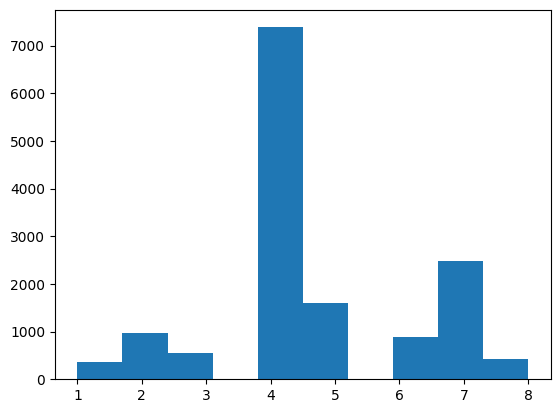

In [42]:
pl.hist(data_train['category'])
pl.show()

### Heatmap

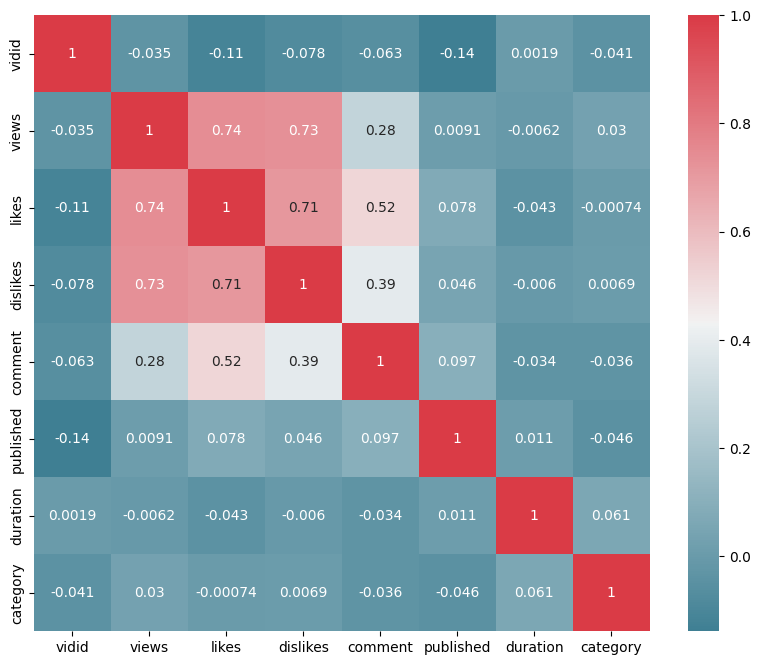

In [43]:
import seaborn as sns

f, ax = pl.subplots(figsize = (10,8))

# Correlation of each column in a DataFrame
corr = data_test.corr()
sns.heatmap(corr, mask = np.zeros_like(corr,dtype = np.bool_), cmap = sns.diverging_palette(220, 10, as_cmap=True),
            square= True, ax =ax, annot= True)
pl.show()

In [44]:
data_test = data_test.drop(["vidid"],axis=1)
data_test.head(10)

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2
5,145820,215,29,19,965,2358,4
6,12921,169,3,73,1060,604,4
7,4502,65,2,8,1840,155,6
8,662956,1841,321,219,955,837,4
9,552009,6732,97,1100,1883,1069,2


### Scaling

In [72]:
data_test = scaler.fit_transform(data_test)
data_test

array([[1.95520958e-03, 1.92237996e-02, 6.05168920e-03, ...,
        9.75296912e-01, 1.07451417e-02, 1.42857143e-01],
       [4.61965571e-03, 2.55286311e-02, 9.43841435e-03, ...,
        8.66983373e-01, 9.29309552e-03, 7.14285714e-01],
       [1.26614645e-04, 9.68532080e-05, 3.05360464e-04, ...,
        4.79334917e-01, 5.49115462e-02, 4.28571429e-01],
       ...,
       [8.40188347e-03, 1.43905121e-02, 3.07858868e-02, ...,
        8.66033254e-01, 1.03821302e-02, 7.14285714e-01],
       [3.17494650e-03, 5.12072284e-03, 4.19176637e-03, ...,
        8.20902613e-01, 4.59814622e-03, 4.28571429e-01],
       [2.34068537e-05, 3.74915644e-05, 2.77600422e-05, ...,
        9.48218527e-01, 1.47382687e-02, 4.28571429e-01]])

### Reloading the Support Vector Regressor
Because it performed the best on Mean Absolute Error

In [101]:
joblib_model = joblib.load("SVM_YouTubeAdview.pkl")
Test_predict_SVM = joblib_model.predict(data_test)

### Reloading the Random Forest Regressor
Because it performed the best on Root Mean Squared Error

In [100]:
joblib_model = joblib.load("randomForest_YouTubeAdview.pkl")
Test_predict_RF = joblib_model.predict(data_test)

In [102]:
Test_predict_SVM[100:]

array([3.68126403, 1.275911  , 2.17532022, ..., 2.70508503, 1.80757077,
       1.91711512])

In [107]:
Test_predict_RF

array([1.35652021e+03, 5.10221933e+03, 1.05802914e+02, ...,
       9.69053260e+02, 4.29307231e+00, 1.01555727e+02])

Random Forest gives the best results so we will be choosing it

### Writing to csv

In [109]:
# r= zip(Test_predict_RF)

In [110]:
# import csv
# with open('PredictedAdview.csv', "w") as s:
#     w = csv.writer(s)
#     for row in r:
#         w.writerow(row)

In [113]:
# pd.DataFrame(Test_predict_RF).to_csv('PredictedAdview.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [114]:
np.savetxt('PredictedAdview.csv',Test_predict_RF, fmt = '%d', delimiter=",")    